In [ ]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# path = '/content/drive/Shared drives/670 final'
# os.chdir(path)
# os.listdir(path)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score

In [ ]:
df_orig = pd.read_csv('UMich Dataset.csv')
df_orig.head()

,id,quickadd,isclosed,amount,industry,title,salestype,daysopen,amount_bucket,meetingcount,sales_Department,PipelineQualityModel,Won_First_Opp,Months_Open,Partner_Flag,SDR_Opportunity,Opp_Created_Date,iswon
0,0062S00000vNnD1QAK,0,1,13770.0,Manufacturing,Senior Account Executive,N,31-60 Days,"10,000-",5,Outside Sales,Data Quality,1,1,0,1,2/26/2020,1
1,0062S00000vNPfCQAW,0,0,500.0,Wholesale Trade,Senior Account Executive,N,91+ Days,500,0,Outside Sales,Data Quality,0,9,0,1,2/6/2020,0
2,0062S00000vNPq0QAG,0,1,164.0,Retail Trade,Multimedia Specialist,A,0-30 Days,100-499,0,Other,Data Quality,1,0,0,0,2/6/2020,1
3,0062S00000vNPVHQA4,0,1,7718.0,Finance and Insurance,Regional Sales Manager,A,31-60 Days,"5,000-9,999",0,Outside Sales,Data Quality,1,1,0,0,2/6/2020,1
4,0062S00000vNQhiQAG,0,1,500.0,Manufacturing,Senior Account Executive,N,31-60 Days,500,0,Outside Sales,Data Quality,0,1,0,0,2/7/2020,0


In [ ]:
df_orig.Opp_Created_Date.head()

0   2020-02-26
1   2020-02-06
2   2020-02-06
3   2020-02-06
4   2020-02-07
Name: Opp_Created_Date, dtype: datetime64[ns]

In [ ]:
df_orig['Opp_Created_Date'] = pd.to_datetime(df_orig['Opp_Created_Date'], 
 format = '%m/%d/%Y', 
 errors = 'coerce')

In [ ]:
df = df_orig.drop(columns=['id','Opp_Created_Date']).copy()

In [ ]:
df.shape

(57170, 16)

In [ ]:
df.dtypes

quickadd                  int64
isclosed                  int64
amount                  float64
industry                 object
title                    object
salestype                object
daysopen                 object
amount_bucket            object
meetingcount              int64
sales_Department         object
PipelineQualityModel     object
Won_First_Opp             int64
Months_Open               int64
Partner_Flag              int64
SDR_Opportunity           int64
iswon                     int64
dtype: object

In [ ]:
df.isna().sum()

quickadd                   0
isclosed                   0
amount                  2764
industry                   0
title                      0
salestype                  0
daysopen                1271
amount_bucket           2764
meetingcount               0
sales_Department           0
PipelineQualityModel       0
Won_First_Opp              0
Months_Open                0
Partner_Flag               0
SDR_Opportunity            0
iswon                      0
dtype: int64

In [ ]:
# remove na
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [ ]:
df.shape

(53139, 16)

#### correlation analysis

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

For all continuous variables, the correlation value between each pairs is comparetively low. As a results, we can assume that the continuous variables in the dataset are independent variables to each other.

<AxesSubplot:>

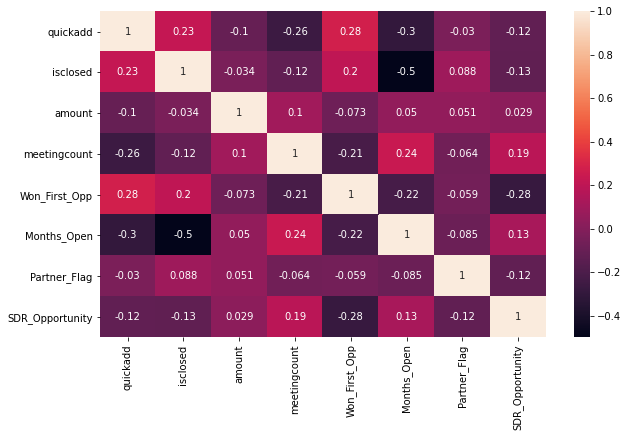

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns='iswon').corr(), annot=True)

/Users/zzy9920/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


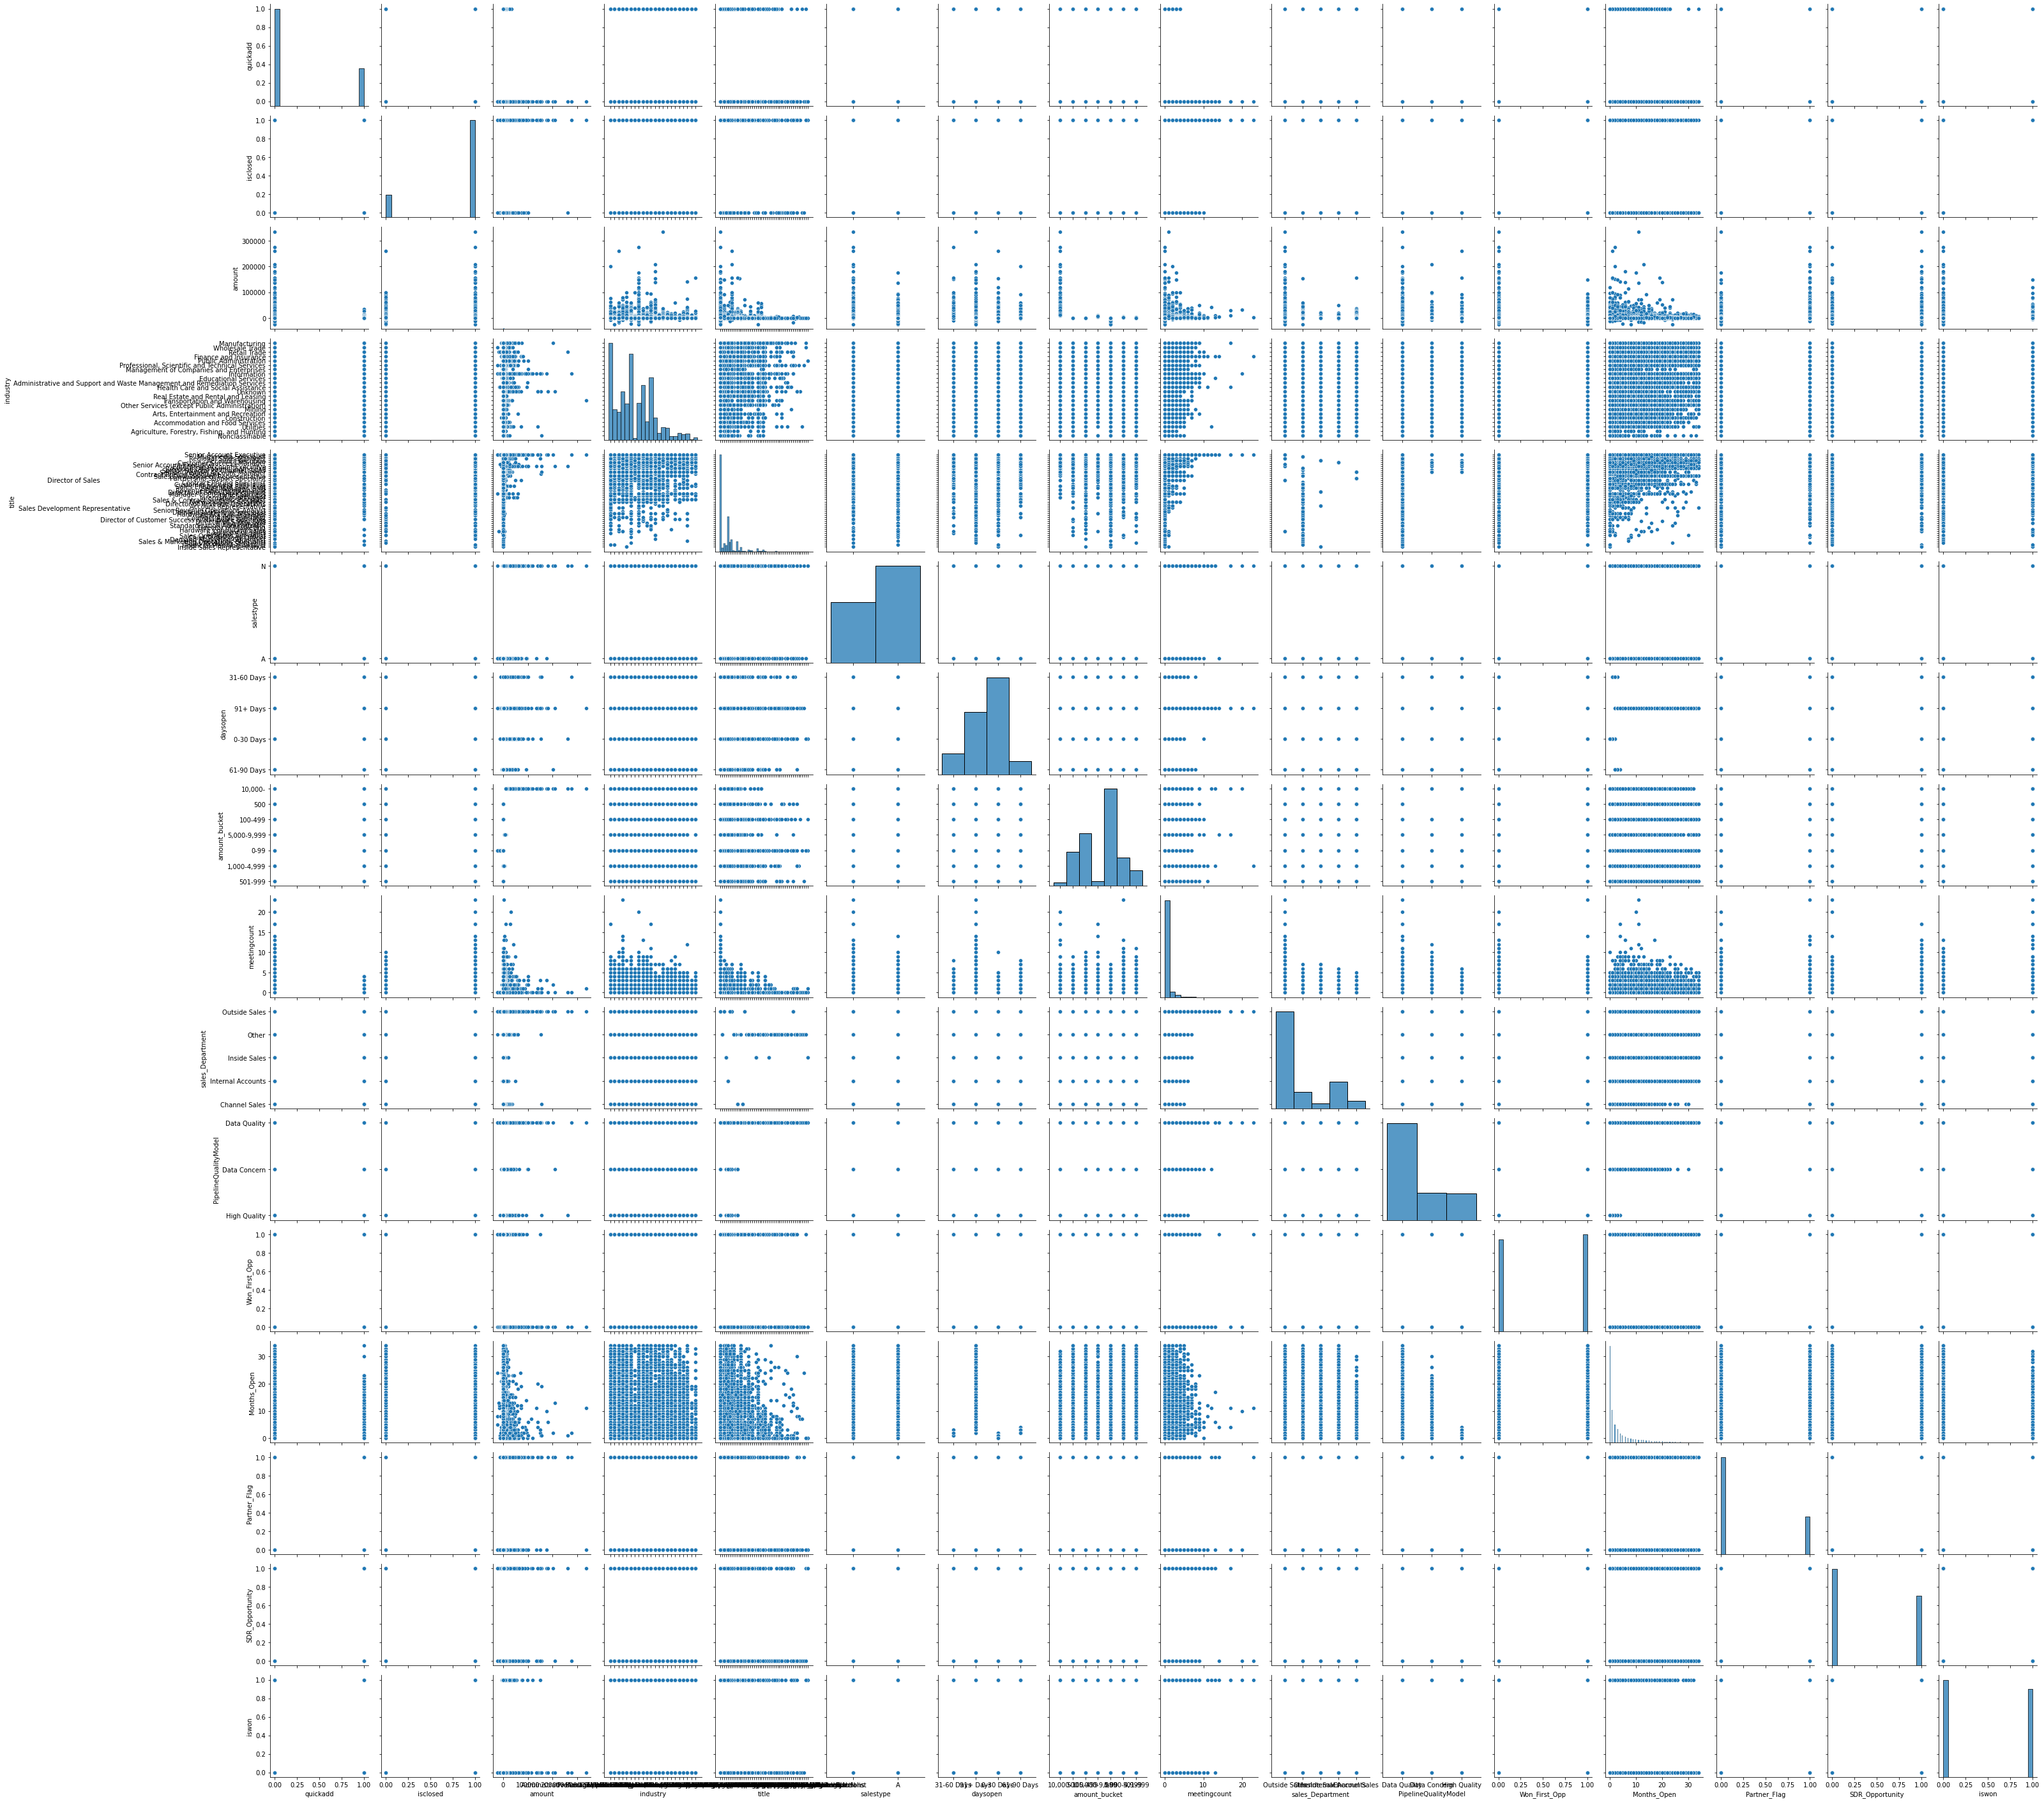

In [ ]:
sns.pairplot(data=df,vars=df.drop(columns='iswon').columns)

#### Analysis the relationship between each variables and our outcome "iswon" in the dataset
- #### Find out which variables are the most important ones to help decide the outcome.

In [ ]:
r_squared = []
df_r = pd.DataFrame(df.drop(columns='iswon').columns.tolist(),columns=['features'])

In [ ]:
df_r

,features
0,quickadd
1,isclosed
2,amount
3,industry
4,title
5,salestype
6,daysopen
7,amount_bucket
8,meetingcount
9,sales_Department


##### iswon - quickadd


In [ ]:
model = smf.ols(formula='iswon~quickadd',data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                 1.716e+04
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:53   Log-Likelihood:                -31065.
No. Observations:               53139   AIC:                         6.213e+04
Df Residuals:                   53137   BIC:                         6.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3209      0.002    144.457      0.0

In [ ]:
r_squared.append(results.rsquared)

##### iswon - isclosed 
> - isclosed column only has one unique value which is 1


In [ ]:
df_mod = df.copy()

In [ ]:
df_mod['isclosed_str'] = df_mod['isclosed'].astype(str)

In [ ]:
df_mod.isclosed_str.unique().tolist()

['1', '0']

In [ ]:
model = smf.ols(formula='iswon~isclosed_str',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                 1.395e+04
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:53   Log-Likelihood:                -32309.
No. Observations:               53139   AIC:                         6.462e+04
Df Residuals:                   53137   BIC:                         6.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.944e-16      0.00

In [ ]:
r_squared.append(results.rsquared)

---
##### iswon - amount      

![image-2.png](attachment:image-2.png)

In [ ]:
amount = np.array(df_mod.amount)
norm = np.linalg.norm(amount)
amount_norm = amount/norm
df_mod['amount_norm'] = amount_norm

In [ ]:
model = smf.ols(formula='iswon~amount_norm',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     397.0
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           5.29e-88
Time:                        00:23:53   Log-Likelihood:                -38304.
No. Observations:               53139   AIC:                         7.661e+04
Df Residuals:                   53137   BIC:                         7.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4832      0.002    220.008      

In [ ]:
r_squared.append(results.rsquared)

##### iswon - industry         


In [ ]:
model = smf.ols(formula='iswon~industry',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.61
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           3.32e-91
Time:                        00:23:54   Log-Likelihood:                -38255.
No. Observations:               53139   AIC:                         7.655e+04
Df Residuals:                   53117   BIC:                         7.675e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
r_squared.append(results.rsquared)

##### iswon - title            


In [ ]:
model = smf.ols(formula='iswon~title',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:54   Log-Likelihood:                -35643.
No. Observations:               53139   AIC:                         7.138e+04
Df Residuals:                   53091   BIC:                         7.181e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [ ]:
r_squared.append(results.rsquared)

##### iswon - salestype       

In [ ]:
df_mod.salestype.unique().tolist()

['N', 'A']

In [ ]:
model = smf.ols(formula='iswon~salestype',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     9634.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:54   Log-Likelihood:                -34075.
No. Observations:               53139   AIC:                         6.815e+04
Df Residuals:                   53137   BIC:                         6.817e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6302      0.003    247.

In [ ]:
r_squared.append(results.rsquared)

##### iswon - daysopen       


In [ ]:
model = smf.ols(formula='iswon~daysopen',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:54   Log-Likelihood:                -26330.
No. Observations:               53139   AIC:                         5.267e+04
Df Residuals:                   53135   BIC:                         5.270e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
r_squared.append(results.rsquared)

##### iswon - amount_bucket    


In [ ]:
df_mod.amount_bucket.unique().tolist()

['10,000-', '500', '100-499', '5,000-9,999', '0-99', '1,000-4,999', '501-999']

In [ ]:
model = smf.ols(formula='iswon~amount_bucket',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     2773.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:55   Log-Likelihood:                -31264.
No. Observations:               53139   AIC:                         6.254e+04
Df Residuals:                   53132   BIC:                         6.260e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
r_squared.append(results.rsquared)

##### iswon - meetingcount      


In [ ]:
model = smf.ols(formula='iswon~meetingcount',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2127.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:55   Log-Likelihood:                -37459.
No. Observations:               53139   AIC:                         7.492e+04
Df Residuals:                   53137   BIC:                         7.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5173      0.002    223.618   

In [ ]:
r_squared.append(results.rsquared)

##### iswon - sales_Department     


In [ ]:
model = smf.ols(formula='iswon~sales_Department',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     512.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:55   Log-Likelihood:                -37496.
No. Observations:               53139   AIC:                         7.500e+04
Df Residuals:                   53134   BIC:                         7.505e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
r_squared.append(results.rsquared)

##### iswon - PipelineQualityModel   


In [ ]:
df_mod.PipelineQualityModel.unique().tolist()

['Data Quality', 'Data Concern', 'High Quality']

In [ ]:
model = smf.ols(formula='iswon~PipelineQualityModel',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3821.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:55   Log-Likelihood:                -34931.
No. Observations:               53139   AIC:                         6.987e+04
Df Residuals:                   53136   BIC:                         6.990e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
r_squared.append(results.rsquared)

##### iswon - Won_First_Opp  


In [ ]:
df_mod.Won_First_Opp.unique().tolist()

[1, 0]

In [ ]:
df_mod['Won_First_Opp_str'] = df_mod['Won_First_Opp'].astype(str).tolist()

In [ ]:
df_mod.Won_First_Opp_str.unique().tolist()

['1', '0']

In [ ]:
model = smf.ols(formula='iswon~Won_First_Opp_str',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     7874.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:55   Log-Likelihood:                -34830.
No. Observations:               53139   AIC:                         6.966e+04
Df Residuals:                   53137   BIC:                         6.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
r_squared.append(results.rsquared)

##### iswon - Months_Open  


In [ ]:
df_mod.Months_Open.unique().tolist()

[1,
 9,
 0,
 5,
 2,
 8,
 4,
 16,
 6,
 10,
 14,
 12,
 3,
 11,
 19,
 7,
 17,
 18,
 15,
 27,
 13,
 31,
 30,
 32,
 20,
 25,
 23,
 29,
 28,
 26,
 34,
 24,
 22,
 21,
 33]

In [ ]:
model = smf.ols(formula='iswon~Months_Open',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                 1.506e+04
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:23:55   Log-Likelihood:                -31873.
No. Observations:               53139   AIC:                         6.375e+04
Df Residuals:                   53137   BIC:                         6.377e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6181      0.002    275.999      

In [ ]:
r_squared.append(results.rsquared)

##### iswon - Partner_Flag  


In [ ]:
df_mod.Partner_Flag.unique().tolist()

[0, 1]

In [ ]:
df_mod['Partner_Flag_str'] = df_mod.Partner_Flag.astype(str).tolist()

In [ ]:
model = smf.ols(formula='iswon~Partner_Flag_str',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     61.25
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           5.11e-15
Time:                        00:23:56   Log-Likelihood:                -38471.
No. Observations:               53139   AIC:                         7.695e+04
Df Residuals:                   53137   BIC:                         7.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

In [ ]:
r_squared.append(results.rsquared)

##### iswon - SDR_Opportunity

In [ ]:
df_mod.SDR_Opportunity.unique().tolist()

[1, 0]

In [ ]:
df_mod['SDR_Opportunity_str'] = df_mod.SDR_Opportunity.astype(str).tolist()

In [ ]:
model = smf.ols(formula='iswon~SDR_Opportunity_str',data=df_mod)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  iswon   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     993.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          5.00e-216
Time:                        00:23:56   Log-Likelihood:                -38010.
No. Observations:               53139   AIC:                         7.602e+04
Df Residuals:                   53137   BIC:                         7.604e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
r_squared.append(results.rsquared)

---

In [ ]:
df_r['r_squared'] = r_squared

In [ ]:
df_r

,features,r_squared
0,quickadd,0.244138
1,isclosed,0.207911
2,amount,0.007415
3,industry,0.009247
4,title,0.102013
5,salestype,0.153482
6,daysopen,0.367510
7,amount_bucket,0.238447
8,meetingcount,0.038485
9,sales_Department,0.037132


#### features with rsquared over 0.2

In [ ]:
features_list_1 = df_r[df_r.r_squared>=0.2].features.tolist()
features_list_1

['quickadd', 'isclosed', 'daysopen', 'amount_bucket', 'Months_Open']

In [ ]:
df_1 = df[features_list_1+['iswon']].copy()

In [ ]:
daysopen = df_1.daysopen.unique().tolist()
daysopen_enc = OrdinalEncoder().fit(np.array(daysopen).reshape(-1,1))
df_1['daysopen'] = daysopen_enc.transform(df_1[['daysopen']])
df_1

,quickadd,isclosed,daysopen,amount_bucket,Months_Open,iswon
0,0,1,1.0,"10,000-",1,1
1,0,0,3.0,500,9,0
2,0,1,0.0,100-499,0,1
3,0,1,1.0,"5,000-9,999",1,1
4,0,1,1.0,500,1,0
...,...,...,...,...,...,...
53134,1,1,0.0,0-99,0,1
53135,0,1,0.0,0-99,0,1
53136,0,1,3.0,"1,000-4,999",14,0
53137,0,1,3.0,"1,000-4,999",4,0


In [ ]:
amount_bucket = df_1.amount_bucket.unique().tolist()
amount_bucket_enc = OrdinalEncoder().fit(np.array(amount_bucket).reshape(-1,1))
df_1['amount_bucket'] = amount_bucket_enc.transform(df_1[['amount_bucket']])
df_1

,quickadd,isclosed,daysopen,amount_bucket,Months_Open,iswon
0,0,1,1.0,2.0,1,1
1,0,0,3.0,5.0,9,0
2,0,1,0.0,3.0,0,1
3,0,1,1.0,4.0,1,1
4,0,1,1.0,5.0,1,0
...,...,...,...,...,...,...
53134,1,1,0.0,0.0,0,1
53135,0,1,0.0,0.0,0,1
53136,0,1,3.0,1.0,14,0
53137,0,1,3.0,1.0,4,0


In [ ]:
df_train_1 = df_1[df_1['isclosed']==1].drop(columns='isclosed')
df_test_1 = df_1[df_1['isclosed']==0].drop(columns='isclosed')

X_train_val_1 = df_train_1.drop(columns='iswon')
y_train_val_1 = df_train_1['iswon']

X_test_1 = df_test_1.drop(columns='iswon')

In [ ]:
X_train_1,X_val_1,y_train_1,y_val_1 = train_test_split(X_train_val_1,y_train_val_1)

In [ ]:
mm_scaler = MinMaxScaler()
X_train_scaled_1 = mm_scaler.fit_transform(X_train_1)
X_val_scaled_1 = mm_scaler.transform(X_val_1)

sd_scaler = StandardScaler()
X_train_scaled_1 = sd_scaler.fit_transform(X_train_scaled_1)
X_val_scaled_1 = mm_scaler.transform(X_val_scaled_1)

In [ ]:
# logistic regression
clf = LogisticRegression()
clf.fit(X_train_scaled_1,y_train)
pred_lr = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.582801073775803

In [ ]:
# Knn
clf = KNeighborsClassifier()
clf.fit(X_train_scaled_1,y_train_1)
pred_knn = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.6853651763399056

In [ ]:
# SVC
clf = SVC()
clf.fit(X_train_scaled_1,y_train_1)
pred_svc = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.6899009534388596

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled_1,y_train_1)
pred_rfc = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.6899009534388596

In [ ]:
# MLP
clf = MLPClassifier(max_iter=200)
clf.fit(X_train_scaled_1,y_train_1)
pred_mlp = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.41719892622419696

In [ ]:
# Naive Bayes
clf = GaussianNB()
clf.fit(X_train_scaled_1,y_train_1)
pred_nb = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.582801073775803

In [ ]:
# Adaboost
clf = AdaBoostClassifier()
clf.fit(X_train_scaled_1,y_train_1)
pred_ada = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.6899009534388596

In [ ]:
# GBDT
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled_1,y_train_1)
pred_gbdt = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.6899009534388596

In [ ]:
# Xgboost
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled_1,y_train_1)
pred_xg = clf.predict(X_val_scaled_1)
clf.score(X_val_scaled_1,y_val_1)

0.6899009534388596

In [ ]:
pred_df = pd.DataFrame({
            'lr':pred_lr,
            'knn':pred_knn,
            'svc':pred_svc,
            'rfc':pred_rfc,
            'mlp':pred_mlp,
            'nb':pred_nb,
            'ada':pred_ada,
            'gbdt':pred_gbdt,
            'xg':pred_xg
            })

In [ ]:
pred_df

,lr,knn,svc,rfc,mlp,nb,ada,gbdt,xg
0,1,0,0,0,0,1,0,0,0
1,1,1,1,1,0,1,1,1,1
2,1,0,0,0,0,1,0,0,0
3,1,1,1,1,0,1,1,1,1
4,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
10798,1,0,0,0,0,1,0,0,0
10799,1,1,1,1,0,1,1,1,1
10800,1,0,0,0,0,1,0,0,0
10801,1,0,0,0,0,1,0,0,0


In [ ]:
pred_df['sum'] = pred_df.lr + pred_df.knn + pred_df.svc + pred_df.rfc + pred_df.mlp + pred_df.nb + pred_ada + pred_gbdt + pred_xg

In [ ]:
pred_df['combine_pred'] = np.where(pred_df['sum']>=7,1,0)

In [ ]:
pred_df

,lr,knn,svc,rfc,mlp,nb,ada,gbdt,xg,sum,combine_pred
0,1,0,0,0,0,1,0,0,0,2,0
1,1,1,1,1,0,1,1,1,1,8,1
2,1,0,0,0,0,1,0,0,0,2,0
3,1,1,1,1,0,1,1,1,1,8,1
4,1,0,1,1,0,1,1,1,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...
10798,1,0,0,0,0,1,0,0,0,2,0
10799,1,1,1,1,0,1,1,1,1,8,1
10800,1,0,0,0,0,1,0,0,0,2,0
10801,1,0,0,0,0,1,0,0,0,2,0


In [ ]:
accuracy_score(y_val,pred_df.combine_pred)

0.4729241877256318

#### features with rsquared over 0.1

In [ ]:
features_list_2 = df_r[df_r.r_squared>=0.1].features.tolist()
features_list_2

['quickadd',
 'isclosed',
 'title',
 'salestype',
 'daysopen',
 'amount_bucket',
 'PipelineQualityModel',
 'Won_First_Opp',
 'Months_Open']

In [ ]:
df_2 = df[features_list_2+['iswon']].copy()

In [ ]:
daysopen = df_2.daysopen.unique().tolist()
daysopen_enc = OrdinalEncoder().fit(np.array(daysopen).reshape(-1,1))
df_2['daysopen'] = daysopen_enc.transform(df_2[['daysopen']])
df_2

,quickadd,isclosed,title,salestype,daysopen,amount_bucket,PipelineQualityModel,Won_First_Opp,Months_Open,iswon
0,0,1,Senior Account Executive,N,1.0,"10,000-",Data Quality,1,1,1
1,0,0,Senior Account Executive,N,3.0,500,Data Quality,0,9,0
2,0,1,Multimedia Specialist,A,0.0,100-499,Data Quality,1,0,1
3,0,1,Regional Sales Manager,A,1.0,"5,000-9,999",Data Quality,1,1,1
4,0,1,Senior Account Executive,N,1.0,500,Data Quality,0,1,0
...,...,...,...,...,...,...,...,...,...,...
53134,1,1,Customer Success Manager,A,0.0,0-99,High Quality,1,0,1
53135,0,1,Senior Account Executive,A,0.0,0-99,Data Quality,0,0,1
53136,0,1,Senior Account Executive,N,3.0,"1,000-4,999",Data Concern,0,14,0
53137,0,1,Senior Account Executive,N,3.0,"1,000-4,999",Data Concern,0,4,0


In [ ]:
amount_bucket = df_2.amount_bucket.unique().tolist()
amount_bucket_enc = OrdinalEncoder().fit(np.array(amount_bucket).reshape(-1,1))
df_2['amount_bucket'] = amount_bucket_enc.transform(df_2[['amount_bucket']])
df_2

,quickadd,isclosed,title,salestype,daysopen,amount_bucket,PipelineQualityModel,Won_First_Opp,Months_Open,iswon
0,0,1,Senior Account Executive,N,1.0,2.0,Data Quality,1,1,1
1,0,0,Senior Account Executive,N,3.0,5.0,Data Quality,0,9,0
2,0,1,Multimedia Specialist,A,0.0,3.0,Data Quality,1,0,1
3,0,1,Regional Sales Manager,A,1.0,4.0,Data Quality,1,1,1
4,0,1,Senior Account Executive,N,1.0,5.0,Data Quality,0,1,0
...,...,...,...,...,...,...,...,...,...,...
53134,1,1,Customer Success Manager,A,0.0,0.0,High Quality,1,0,1
53135,0,1,Senior Account Executive,A,0.0,0.0,Data Quality,0,0,1
53136,0,1,Senior Account Executive,N,3.0,1.0,Data Concern,0,14,0
53137,0,1,Senior Account Executive,N,3.0,1.0,Data Concern,0,4,0


In [ ]:
def onehotenc(df_cat):
    enc = OneHotEncoder(handle_unknown='ignore').fit(df_cat)
    col_names = enc.get_feature_names(df_cat.columns)
    output = pd.DataFrame(enc.transform(df_cat).toarray(),columns=col_names)
    return output

def labelenc(df_cat):
    for col in df_cat.columns:
        df_cat[col] = LabelEncoder().fit_transform(df_cat[col])
    return df_cat

In [ ]:
# label encoder
df_cat = df_2[['title','salestype','PipelineQualityModel']].copy()
df_cat = labelenc(df_cat)
df_num = df_2.drop(columns=['title','salestype','PipelineQualityModel'])
# df_clean = pd.concat([df_num,onehotenc(df_cat)],axis=1)
df_2_mod = pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_2_mod

,quickadd,isclosed,daysopen,amount_bucket,Won_First_Opp,Months_Open,iswon,title,salestype,PipelineQualityModel
0,0,1,1.0,2.0,1,1,1,42,1,1
1,0,0,3.0,5.0,0,9,0,42,1,1
2,0,1,0.0,3.0,1,0,1,27,0,1
3,0,1,1.0,4.0,1,1,1,30,0,1
4,0,1,1.0,5.0,0,1,0,42,1,1
...,...,...,...,...,...,...,...,...,...,...
53134,1,1,0.0,0.0,1,0,1,8,0,2
53135,0,1,0.0,0.0,0,0,1,42,0,1
53136,0,1,3.0,1.0,0,14,0,42,1,0
53137,0,1,3.0,1.0,0,4,0,42,1,0


In [ ]:
df_train_2 = df_2_mod[df_2_mod['isclosed']==1].drop(columns='isclosed')
df_test_2 = df_2_mod[df_2_mod['isclosed']==0].drop(columns='isclosed')

X_train_val_2 = df_train_2.drop(columns='iswon')
y_train_val_2 = df_train_2['iswon']

X_test_2 = df_test_2.drop(columns='iswon')

In [ ]:
X_train_2,X_val_2,y_train_2,y_val_2 = train_test_split(X_train_val_2,y_train_val_2)

In [ ]:
mm_scaler = MinMaxScaler()
X_train_scaled_2 = mm_scaler.fit_transform(X_train_2)
X_val_scaled_2 = mm_scaler.transform(X_val_2)

sd_scaler = StandardScaler()
X_train_scaled_2 = sd_scaler.fit_transform(X_train_scaled_2)
X_val_scaled_2 = mm_scaler.transform(X_val_scaled_2)

In [ ]:
# logistic regression
clf = LogisticRegression()
clf.fit(X_train_scaled_2,y_train)
pred_lr = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.5764139590854392

In [ ]:
# Knn
clf = KNeighborsClassifier()
clf.fit(X_train_scaled_2,y_train_2)
pred_knn = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.5954827362769601

In [ ]:
# SVC
clf = SVC()
clf.fit(X_train_scaled_2,y_train_2)
pred_svc = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.5790058317134129

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled_2,y_train_2)
pred_rfc = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.6620383226881422

In [ ]:
# MLP
clf = MLPClassifier(max_iter=400)
clf.fit(X_train_scaled_2,y_train_2)
pred_mlp = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.5321669906507451

In [ ]:
# Naive Bayes
clf = GaussianNB()
clf.fit(X_train_scaled_2,y_train_2)
pred_nb = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.7159122465981672

In [ ]:
# Adaboost
clf = AdaBoostClassifier()
clf.fit(X_train_scaled_2,y_train_2)
pred_ada = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.5764139590854392

In [ ]:
# GBDT
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled_2,y_train_2)
pred_gbdt = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.5543830417476627

In [ ]:
# Xgboost
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled_2,y_train_2)
pred_xg = clf.predict(X_val_scaled_2)
clf.score(X_val_scaled_2,y_val_2)

0.5781727297972785

In [ ]:
pred_df_2 = pd.DataFrame({
            'lr':pred_lr,
            'knn':pred_knn,
            'svc':pred_svc,
            'rfc':pred_rfc,
            'mlp':pred_mlp,
            'nb':pred_nb,
            'ada':pred_ada,
            'gbdt':pred_gbdt,
            'xg':pred_xg
            })

In [ ]:
pred_df_2

,lr,knn,svc,rfc,mlp,nb,ada,gbdt,xg
0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1
2,1,1,1,0,1,0,1,1,1
3,1,1,1,1,1,0,1,1,1
4,1,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
10798,1,1,1,1,1,1,1,1,1
10799,1,1,1,1,1,1,1,1,1
10800,1,1,1,1,0,1,1,0,1
10801,1,1,1,1,1,1,1,1,1


In [ ]:
pred_df_2['sum_'] = pred_df_2.lr + pred_df_2.knn + pred_df_2.svc + pred_df_2.rfc + pred_df_2.mlp + pred_df_2.nb + pred_df_2.ada + pred_df_2.gbdt + pred_df_2.xg



In [ ]:
pred_df_2['combine_pred'] = np.where(pred_df_2['sum_']>=8,1,0)

In [ ]:
pred_df_2

,lr,knn,svc,rfc,mlp,nb,ada,gbdt,xg,sum,combine_pred,sum_
0,1,1,1,1,1,1,1,1,1,9,1,9
1,1,1,1,1,1,1,1,1,1,9,1,9
2,1,1,1,0,1,0,1,1,1,7,0,7
3,1,1,1,1,1,0,1,1,1,8,1,8
4,1,1,1,1,0,1,1,0,1,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
10798,1,1,1,1,1,1,1,1,1,9,1,9
10799,1,1,1,1,1,1,1,1,1,9,1,9
10800,1,1,1,1,0,1,1,0,1,7,0,7
10801,1,1,1,1,1,1,1,1,1,9,1,9


In [ ]:
accuracy_score(y_val,pred_df.combine_pred)

0.4729241877256318

In [ ]:
pred_df_2.combine_pred.unique()

array([1, 0])

In [ ]:
pred_df_2.sum_.unique()

array([9, 7, 8, 6, 5])

In [ ]:
# documentation
#--------------------------
# 1st try: 
# features with rsquared >= 0.2, metrics: accuracy
# logistic regression: 0.58
# KNN: 0.69
# SVC: 0.69
# random forest: 0.69
# MLP: 0.42 (200)
# Naive Bayes: 0.58
# Ada: 0.69
# GBDT: 0.69
# xgboost: 0.69
# sum: 0.47
#--------------------------
# 2nd try: 
# features with rsquared >= 0.1, metrics: accuracy
# logistic regression: 0.58
# KNN: 0.60
# SVC: 0.58
# random forest: 0.66
# MLP: 0.53
# Naive Bayes: 0.72
# Ada: 0.58
# GBDT: 0.55
# xgboost: 0.58
# sum: 0.47
#___________________________